In [1]:
#First let's open the simulation file
from tools import *
import pickle

with open('../MicroBooNE/Simulation.pkl', 'rb') as infile:
  data = pickle.load(infile)

In [2]:
#Let's look at the variables contained in the dataset

for variable_name in list(data):
  print(variable_name)

Distance to closest cosmic ray track
Length of lepton track
Distance to longest track
Simulation category
Topological muon ML score
End position of lepton track z component
End position of lepton track y component
End position of lepton track x component
Track vs shower ML score
Particle ID LLh
Start position of lepton track z component
Start position of lepton track y component
Start position of lepton track x component
Interaction vertex position x component
Interaction vertex position y component
Interaction vertex position z component
Total energy
Subevent
Muon momenutm (length estimate)
Muon momenutm (scattering estimate)
Simulation weight
Simulated neutrino energy
Simulated neutrino flight distance
Simulated muon momentum


In [18]:
variable = 'Simulated muon momentum'
label = 'Simulated muon momentum [GeV/c]'


<Figure size 2400x1800 with 0 Axes>

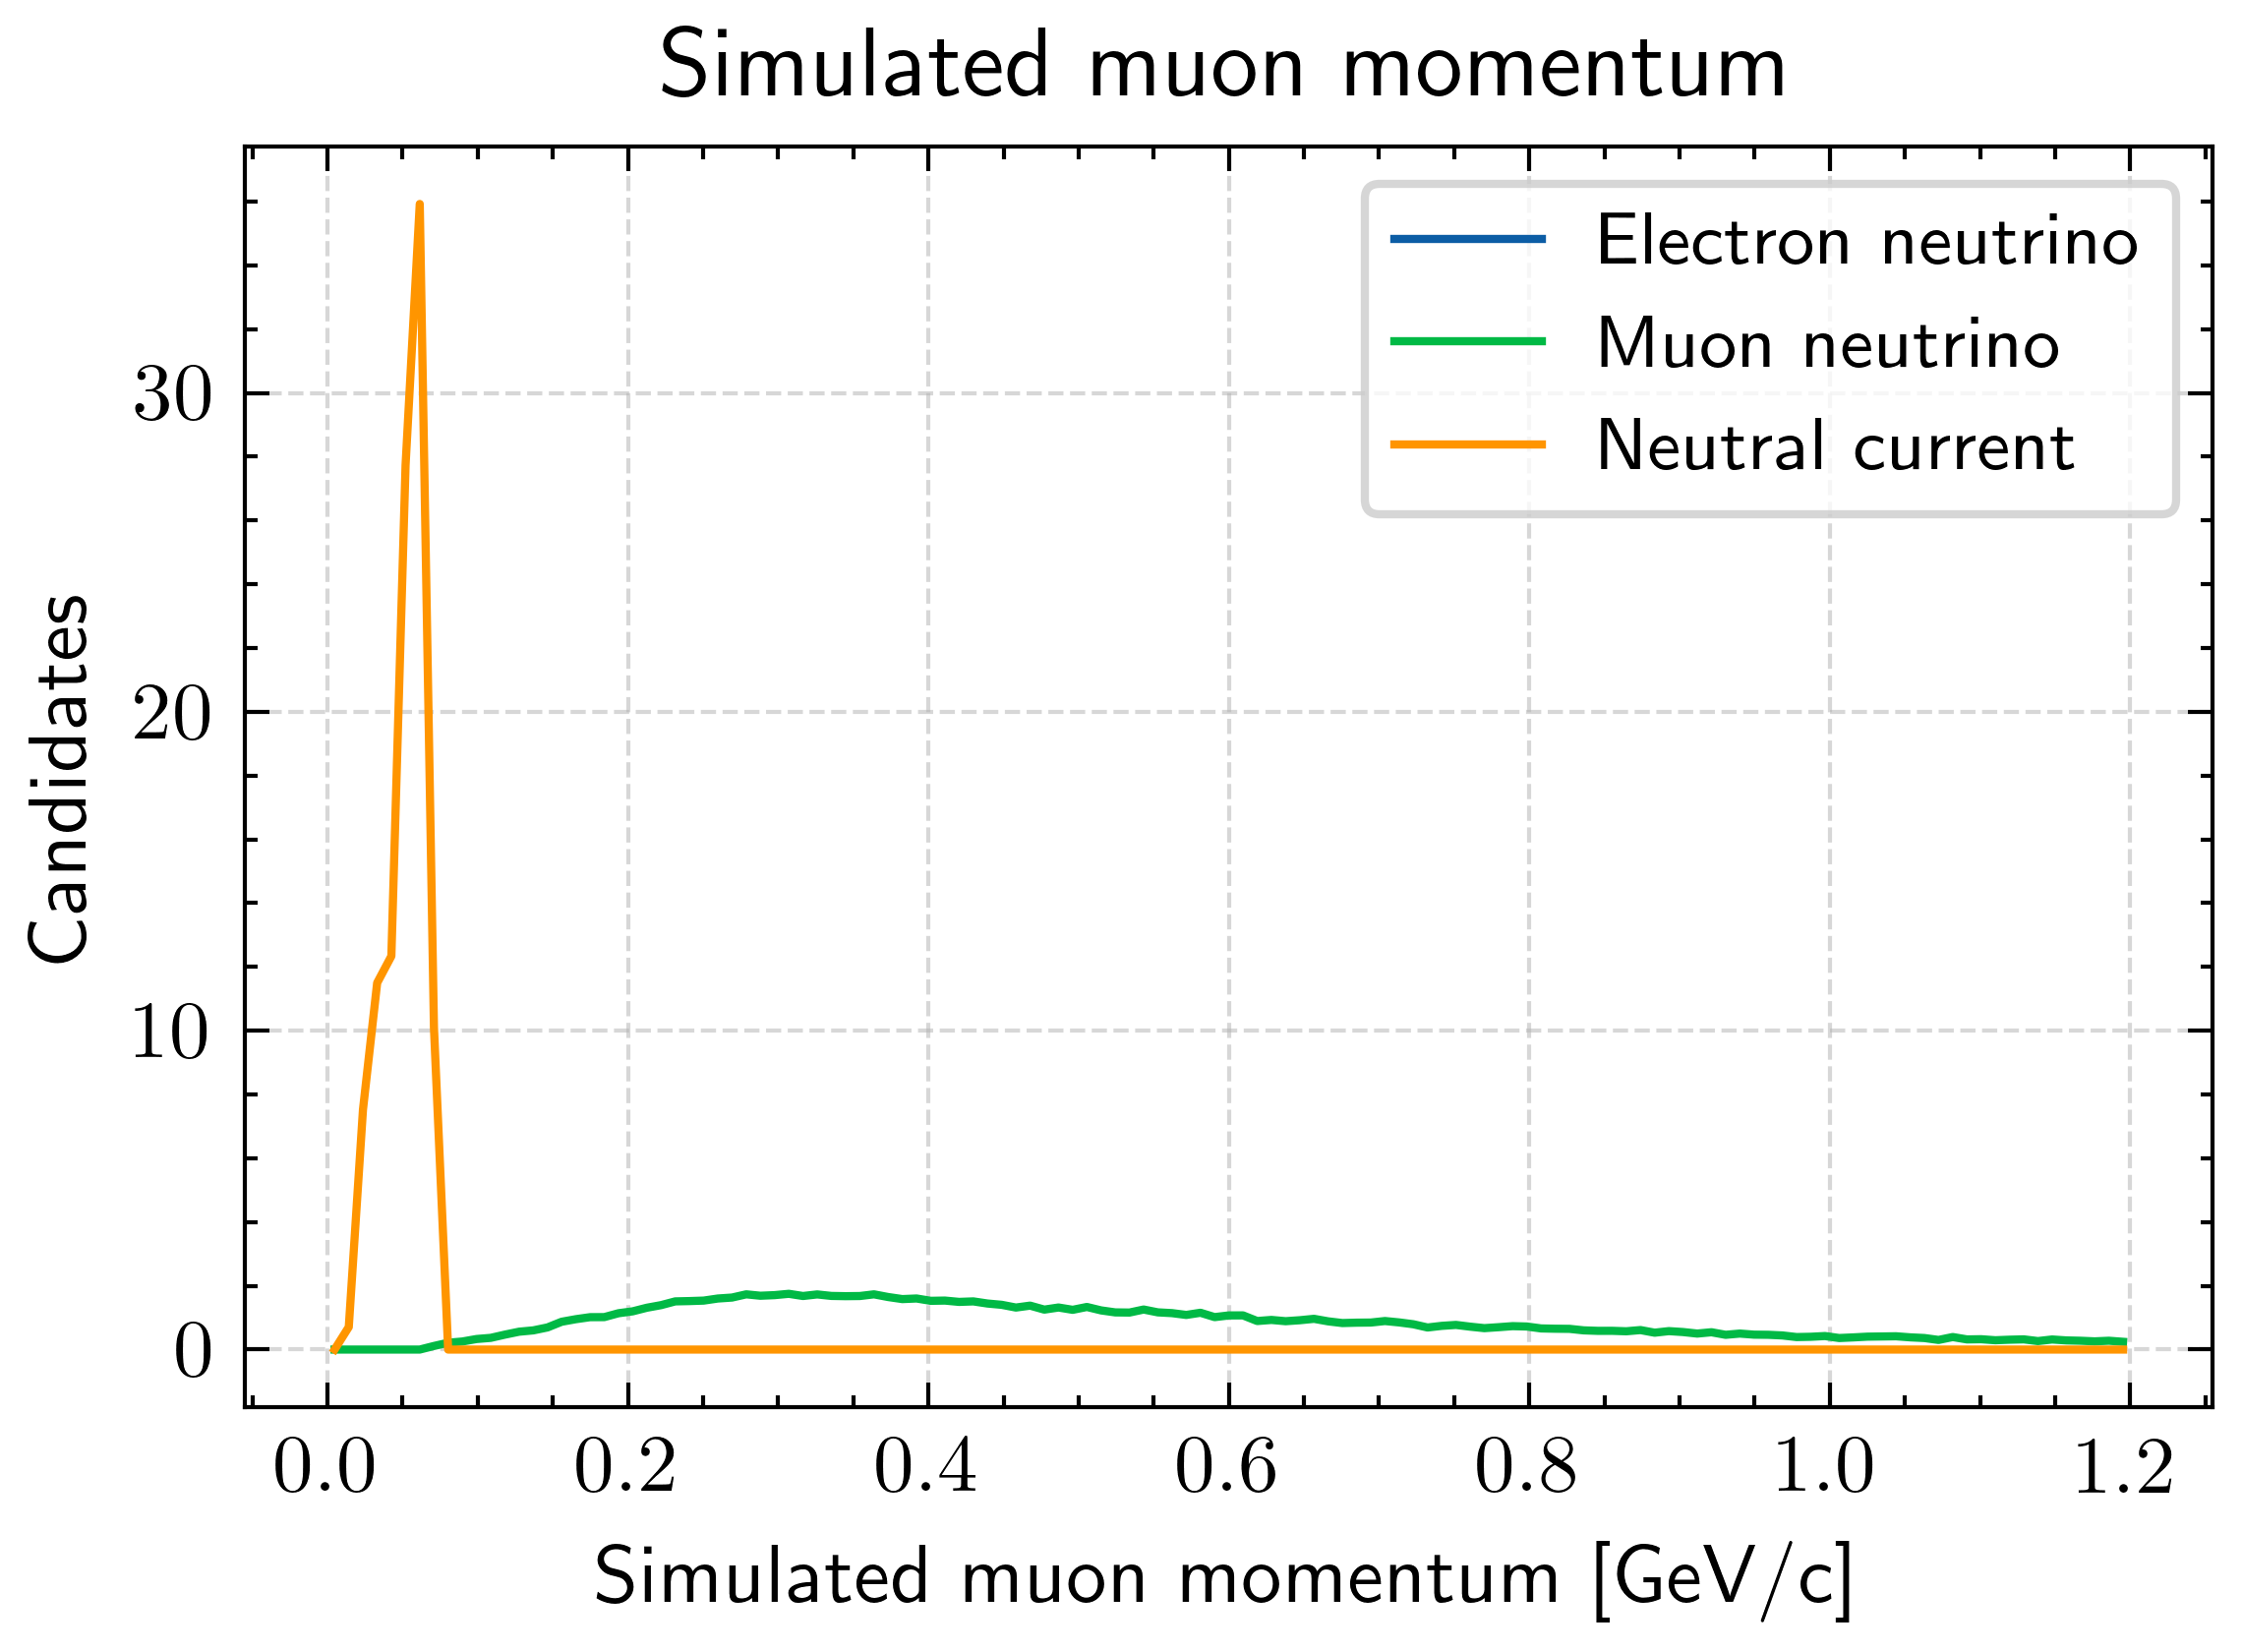

In [28]:
#This is one more thing to note before this plot is correct. The simulation is
#not a perfect representation of reality. Sometimes too many events were
#created in some region of the parameter space, sometimes too few. This is true
#in our case. We can correct for this, by making events in overpopulated regions
#contribute less, and in under populated regions contribute more. Each event is
#given a "weight" that represents its relative contriubution. The number of interactions
#is then the sum of the weights not the sum of the entries. When processing this data
#we must take into account these weights. For example, the above plot should be

plt.figure(dpi=600, figsize=(4,3))



cats = {10: "Electron neutrino", 
        21: "Muon neutrino", 
        31: "Neutral current"}

# common bins for all three
vals_all = data[variable]
bins = np.linspace(0, 1.2, 128)

plt.figure(dpi=600, figsize=(4,3))

for cat, label_cat in cats.items():
    vals = data.loc[data['Simulation category'] == cat, variable]
    weights = data.loc[data['Simulation category'] == cat, 'Simulation weight']

    counts, edges = np.histogram(vals, bins=bins, weights=weights, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])

    plt.plot(centers, counts, label=label_cat)

plt.title(variable)
plt.xlabel(label)
plt.ylabel('Candidates')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(fontsize=9, frameon=True)
plt.tight_layout()
plt.show()


In [30]:
data.loc[data['Simulation category'] == 31, variable]

43       NaN
44       NaN
45       NaN
48       NaN
57       NaN
          ..
420138   NaN
420148   NaN
420169   NaN
420180   NaN
420183   NaN
Name: Simulated muon momentum, Length: 37287, dtype: float64